In [1]:
import numpy as np
import imageio
import cv2
import matplotlib.pyplot as plt
import glob
import skimage

# BEE DETECT

In [2]:
# Load all images from TRAIN
train_imgs = np.array([np.array(imageio.imread(filename)) for filename in glob.glob('../TRAIN/*.jpg')])

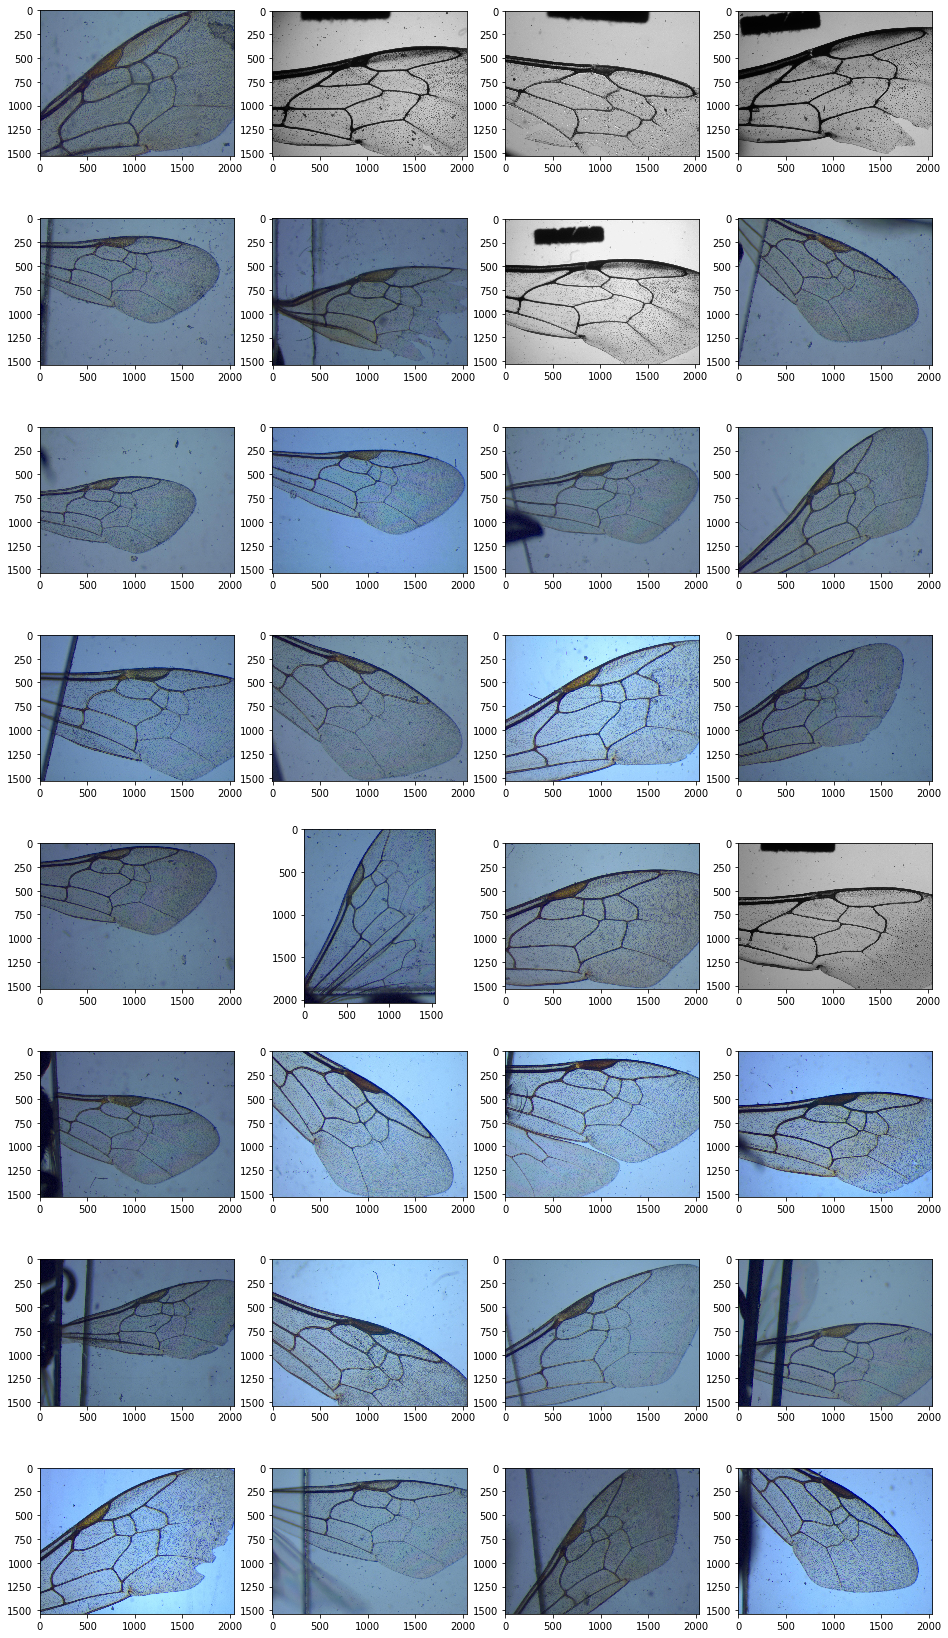

In [3]:
# Print all images from TRAIN
fig=plt.figure(figsize=(16, 30))
for i, img in enumerate(train_imgs):
    fig.add_subplot(8, 4, i+1)
    plt.imshow(img)
plt.show()

In [4]:
# Load one image and CSV from TEST
test_img = imageio.imread('../TEST/01_inf.jpg')
test_point = np.genfromtxt('../TEST/01_inf.csv', delimiter=',')

In [5]:
# Draw points from CSV on the image
def draw_points(img, points):
    img_copy = img.copy()
    for point in points:
        cv2.circle(img_copy,(int(point[1]), int(point[0])), 20, (255,255,0), -1)
    return img_copy

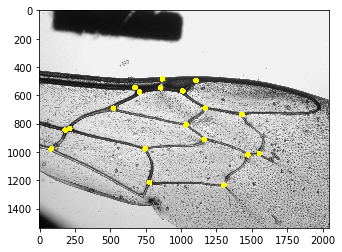

In [6]:
plt.imshow(draw_points(test_img, test_point))

## Threshold the image

In [7]:
img = train_imgs[0].copy()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray,(5,5),0)
#th3 = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,179,28)
ret, thresh = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

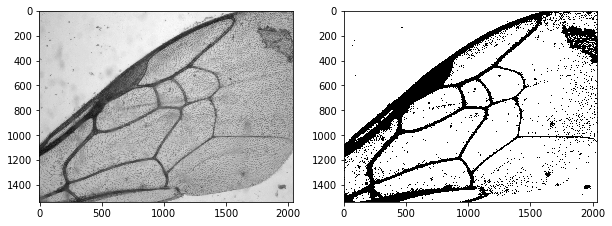

In [8]:
fig=plt.figure(figsize=(10, 10))

fig.add_subplot(1, 2, 1)
plt.imshow(gray, cmap='gray')

fig.add_subplot(1, 2, 2)
plt.imshow(thresh, cmap='gray')

plt.show()

## Noise Removal

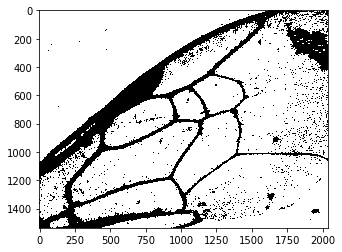

In [9]:
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 3)
plt.imshow(opening, cmap='gray')

## Connected Components

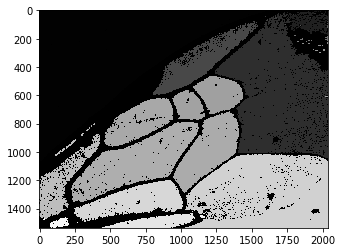

In [10]:
retval, markers = cv2.connectedComponents(opening)
plt.imshow(markers, cmap='gray')

## Watershed

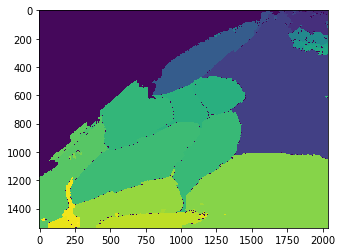

In [11]:
ws = cv2.watershed(img,markers)
plt.imshow(ws)

## Without Connected Components

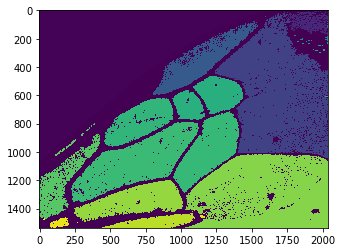

In [12]:
all_labels = skimage.measure.label(opening)
plt.imshow(all_labels)

# Results

In [17]:
def process(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray,(5,5),0)
    ret, thresh = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    kernel = np.ones((3,3),np.uint8)
    opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 3)
    retval, markers = cv2.connectedComponents(opening)
    ws = cv2.watershed(img,markers)
    return ws

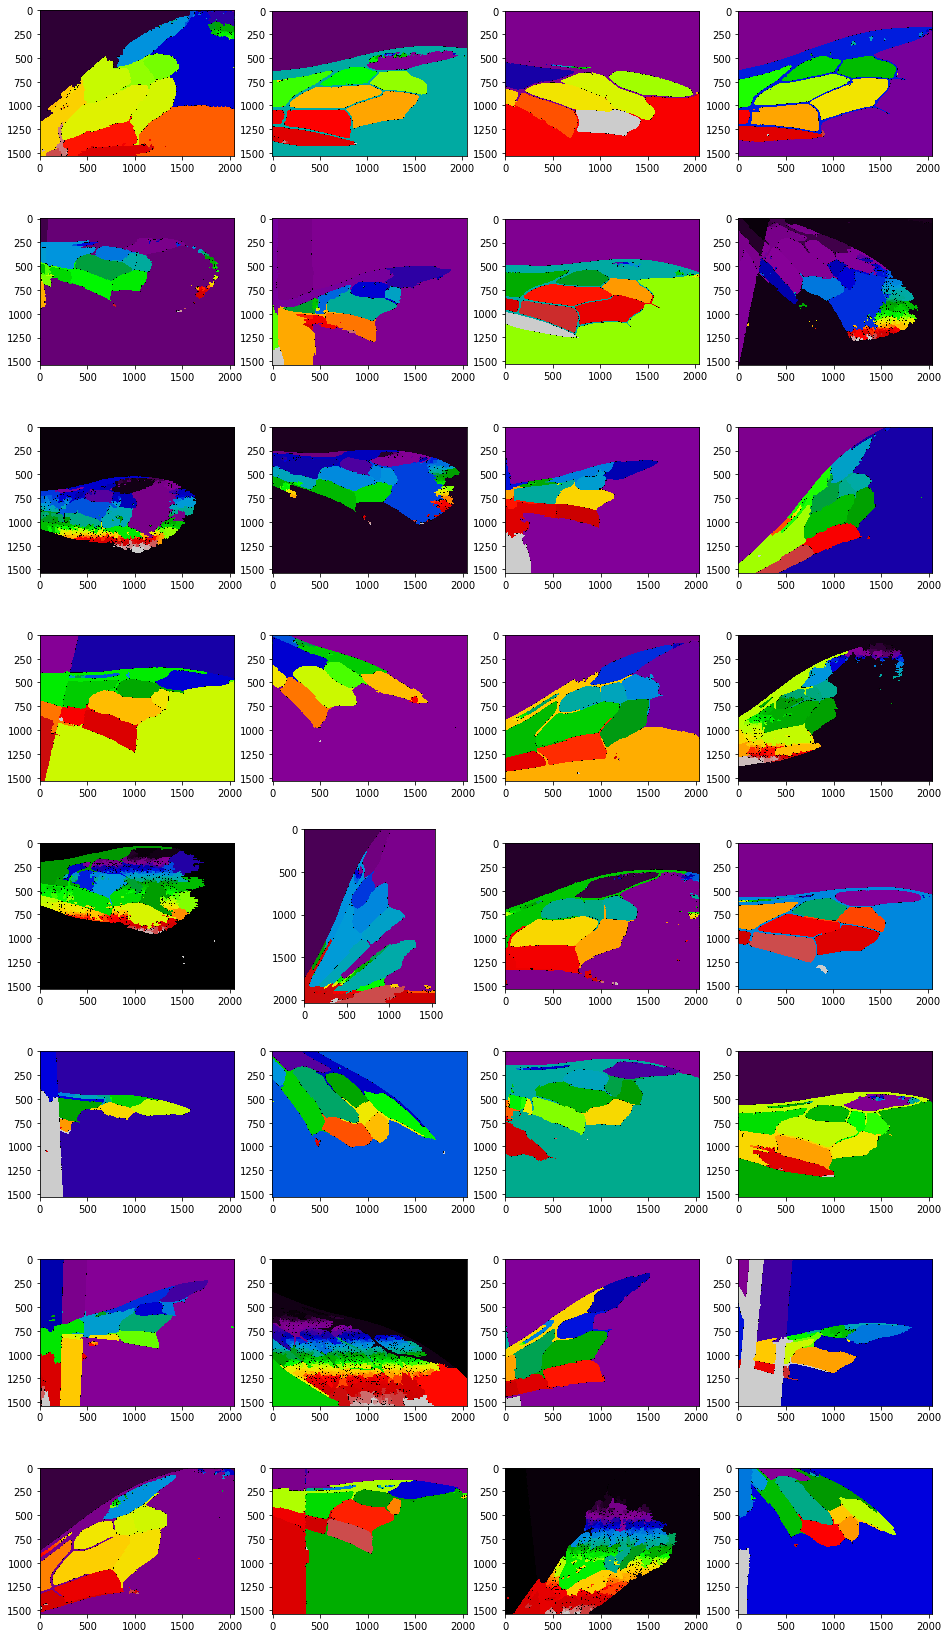

In [18]:
fig=plt.figure(figsize=(16, 30))
for i in range (0, 32):
    img = train_imgs[i].copy()
    ws = process(img)
    fig.add_subplot(8, 4, i+1)
    plt.imshow(ws, cmap='nipy_spectral')
plt.show()

## Without Connected Components

In [15]:
def process2(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray,(5,5),0)
    ret, thresh = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    kernel = np.ones((3,3),np.uint8)
    opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 3)
    retval, markers = cv2.connectedComponents(opening)
    all_labels = skimage.measure.label(opening)
    return all_labels

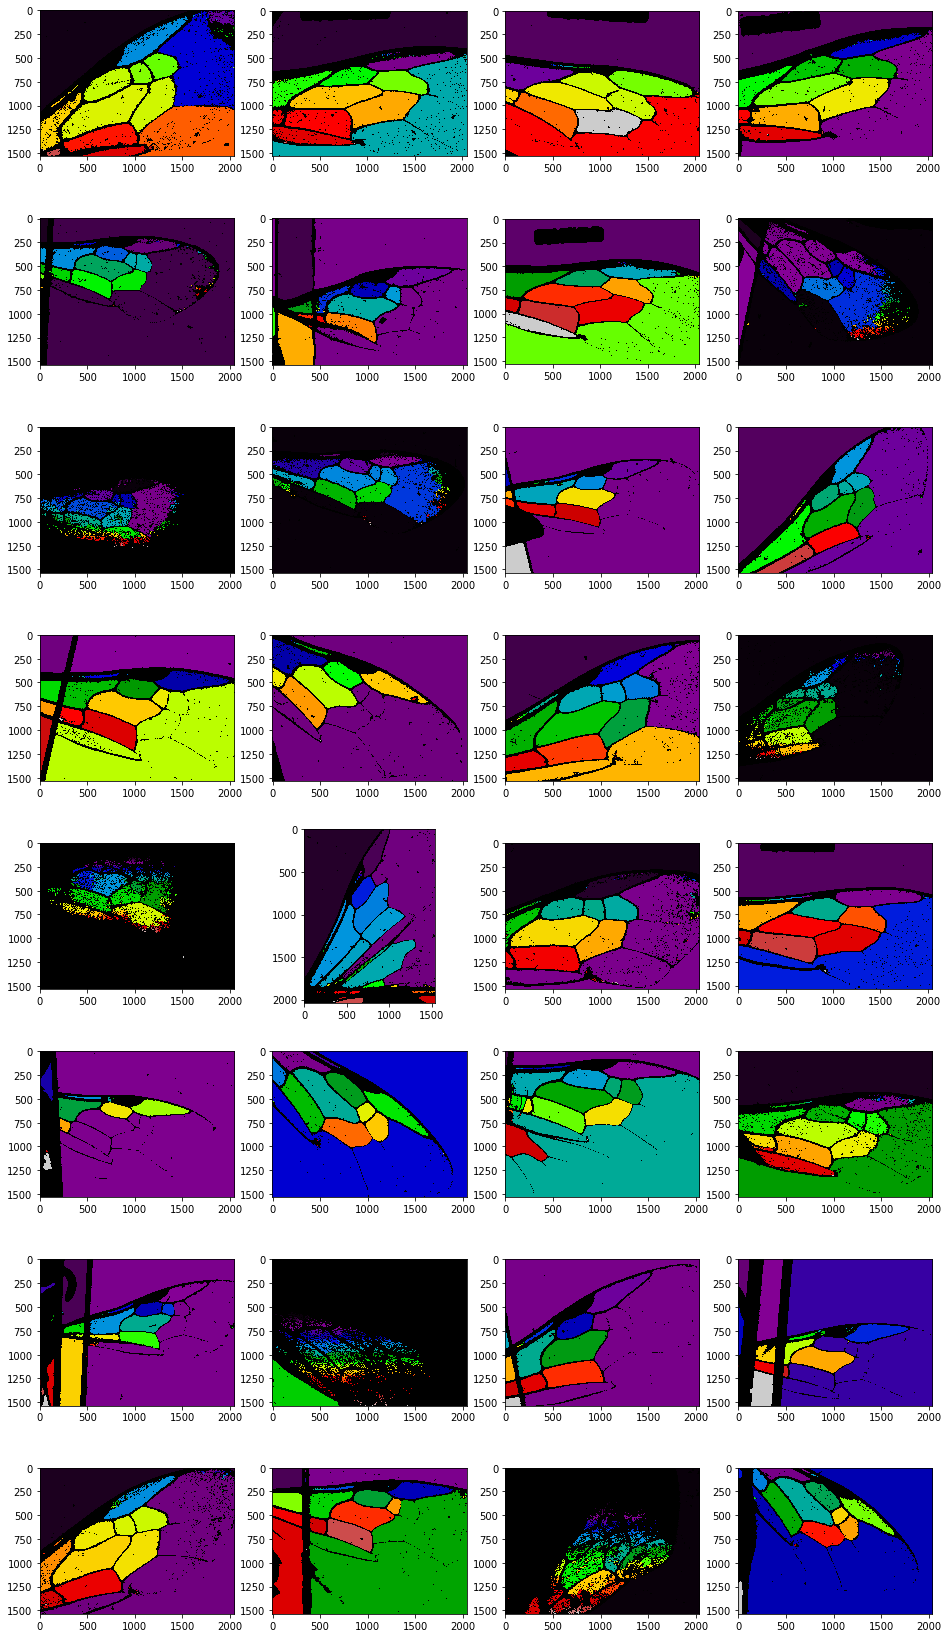

In [16]:
fig=plt.figure(figsize=(16, 30))
for i in range (0, 32):
    img = train_imgs[i].copy()
    ws = process2(img)
    fig.add_subplot(8, 4, i+1)
    plt.imshow(ws, cmap='nipy_spectral')
plt.show()


# Intersections Detection

In [87]:
def intersect(img):
    height, width = img.shape
    step = 5
    points = []
    for i in range(0, height-step, step):
        for j in range(0, width-step, step):
            colors = set()
            for k in range(i, i+step):
                for l in range(j, j+step):
                    pixel = img[k][l]
                    if pixel != -1 and pixel not in colors:
                        colors.add(pixel)
            if len(colors) >= 3:
                points.append((i+step//2, j+step//2))
    return points

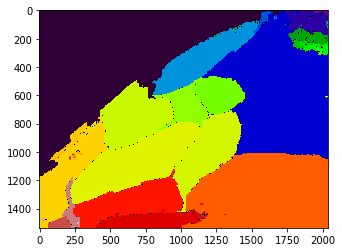

In [88]:
img = train_imgs[0].copy()
ws = process(img)
plt.imshow(ws, cmap='nipy_spectral')

In [89]:
points = intersect(ws)

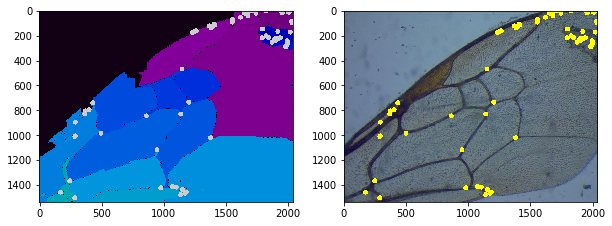

In [90]:
fig=plt.figure(figsize=(10, 10))

fig.add_subplot(1, 2, 1)
plt.imshow(draw_points(ws, points), cmap='nipy_spectral')

fig.add_subplot(1, 2, 2)
plt.imshow(draw_points(img, points))

plt.show()

# Detection on all images

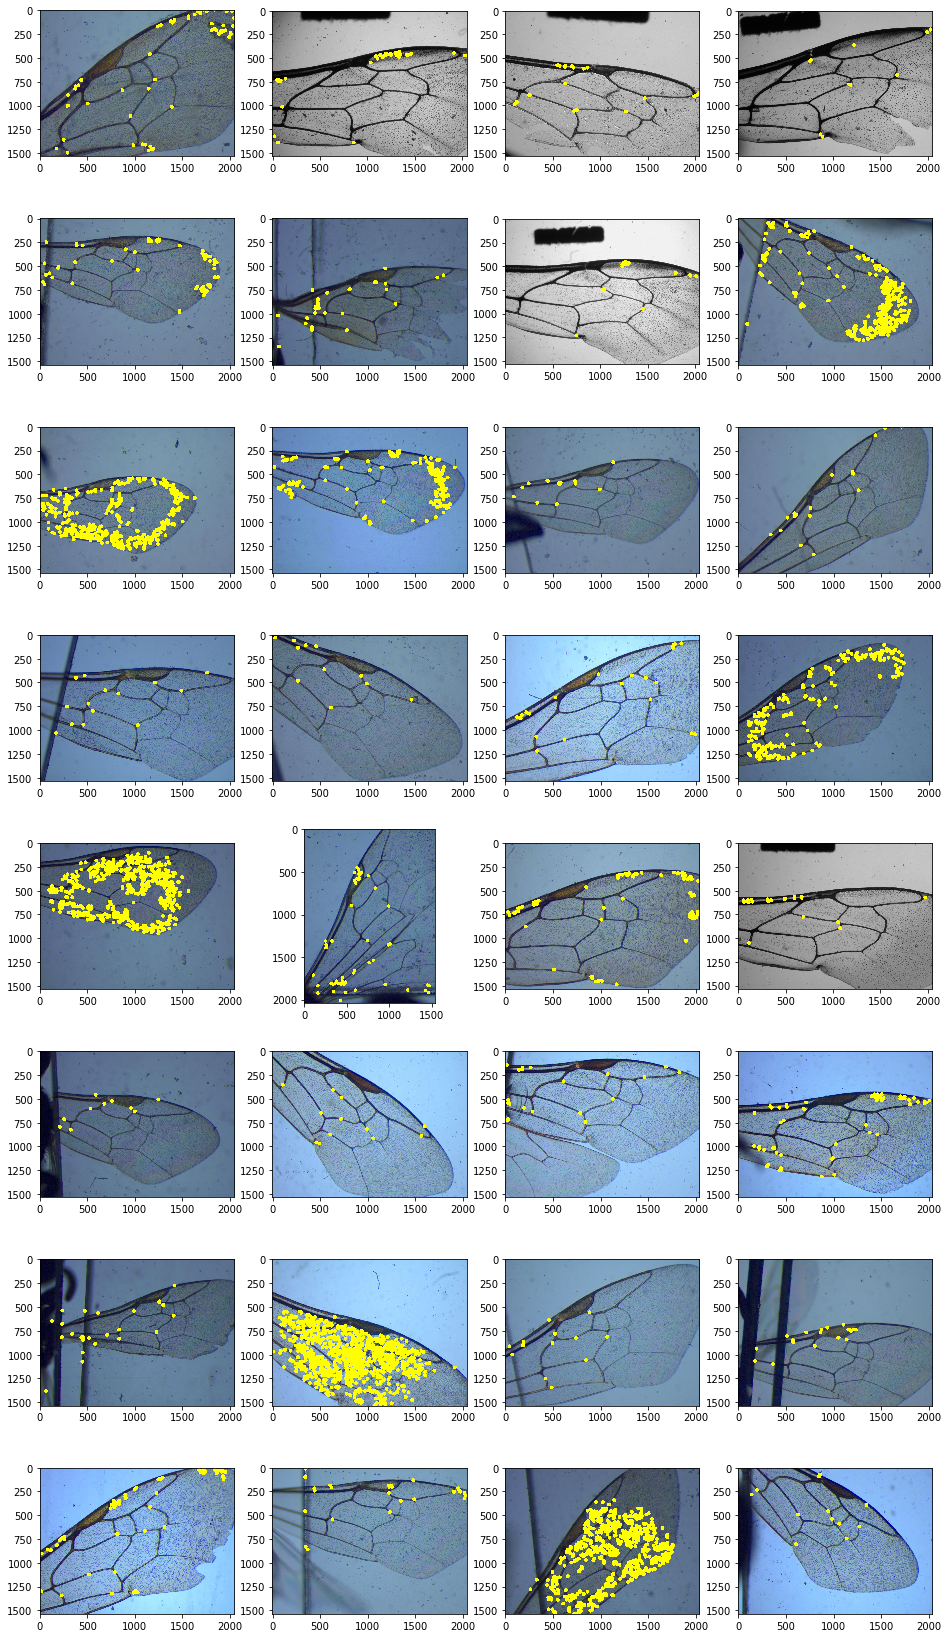

In [86]:
fig=plt.figure(figsize=(16, 30))
for i in range (0, 32):
    img = train_imgs[i].copy()
    ws = process(img)
    points = intersect(ws)
    fig.add_subplot(8, 4, i+1)
    plt.imshow(draw_points(img, points))
plt.show()
